# DATA 606 Capstone
## Marissa Tan
### Impact of COVID-19 on the US Housing Market
__Real Estate and Density Dataset__
- Correlation Matrix
- Split data to 2019 and 2021
- Price Ratio Comparison 2019 and 2021
- Cleansed box plot of outliers 2019 and 2021

In [31]:
import pandas as pd
import numpy as np
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
import missingno as msno

%matplotlib inline

# 1. Merged Density and Real Estate CSV
## 1.1 Read the Real Estate and Density CSV
Acknowledgement Maede Maftouni of Kaggle. Link as follow https://www.kaggle.com/maedemaftouni/us-real-estate-market-trends-visualization

In [2]:
df = pd.read_csv('RE_density.csv', index_col=False)
df.sample(5)

,FIPS,year,month,county,state,date,density,active_listing_count,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_per_square_foot,median_square_feet,total_listing_count
47701,17053,2021,3,Ford County,IL,2021-03-01,27,30.0,104516.0,0.0465,-0.0912,80000.0,0.1437,-0.0643,69.0,1194.0,50.0
70204,21135,2018,11,Lewis County,KY,2018-11-01,27,19.0,170507.0,-0.1514,0.0184,155000.0,-0.0252,0.6667,82.0,1749.0,24.0
2738,1035,2018,12,Conecuh County,AL,2018-12-01,13,31.0,170173.0,0.0500,0.0523,137900.0,0.0000,-0.0143,74.0,1653.0,31.0
80463,24045,2020,1,Wicomico County,MD,2020-01-01,276,282.0,255097.0,0.0043,0.1507,220750.0,0.0036,0.2271,115.0,1866.0,290.0
195252,53029,2020,12,Island County,WA,2020-12-01,416,79.0,882224.0,0.0228,0.3914,592475.0,0.0000,0.2345,300.0,1996.0,240.0


In [3]:
df.columns

Index(['FIPS', 'year', 'month', 'county', 'state', 'date', 'density',
       'active_listing_count', 'average_listing_price',
       'average_listing_price_mm', 'average_listing_price_yy',
       'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'median_listing_price_per_square_foot',
       'median_square_feet', 'total_listing_count'],
      dtype='object')

## 1.2 Check Data Types

In [4]:
# This dataset will be used on some data exploration
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 206924 entries, 0 to 206923
Data columns (total 17 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   FIPS                                  206924 non-null  int64  
 1   year                                  206924 non-null  int64  
 2   month                                 206924 non-null  int64  
 3   county                                206924 non-null  object 
 4   state                                 206924 non-null  object 
 5   date                                  206924 non-null  object 
 6   density                               206924 non-null  int64  
 7   active_listing_count                  206924 non-null  float64
 8   average_listing_price                 206924 non-null  float64
 9   average_listing_price_mm              169923 non-null  float64
 10  average_listing_price_yy              169155 non-null  float64
 11  

# 2. Data Exploration
## 2.1 Price Ratio Comparison 2019 and 2021
- pre-COVID (2019) and post-COVID (2020)
- Price ratio will be derived from the average list price and median list price

In [5]:
filters = [
    (df['average_listing_price_yy'] < 0) & (df['median_listing_price_yy'] < 0),
    (df['average_listing_price_mm'] < 0) & (df['median_listing_price_mm'] < 0),
]
values= ['Down from last year', 'Down from last month']

df['category'] = np.select(filters, values, default ='Increase in prices')
df.sample(4)

,FIPS,year,month,county,state,date,density,active_listing_count,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_per_square_foot,median_square_feet,total_listing_count,category
103486,28085,2019,3,Lincoln County,MS,2019-03-01,59,111.0,235001.0,0.0083,0.2122,157286.0,-0.0170,0.0847,80.0,2007.0,113.0,Increase in prices
139209,39127,2018,2,Perry County,OH,2018-02-01,86,108.0,217358.0,0.0617,0.4171,134450.0,0.1256,0.1962,101.0,1692.0,137.0,Increase in prices
60145,20039,2017,10,Decatur County,KS,2017-10-01,3,6.0,148206.0,0.1054,-0.3799,144500.0,0.1796,-0.3954,91.0,1632.0,6.0,Down from last year
41574,19157,2017,6,Poweshiek County,IA,2017-06-01,31,195.0,180531.0,NaN,NaN,157000.0,NaN,NaN,118.0,1405.0,232.0,Increase in prices


In [6]:
df['year'].unique()

array([2016, 2017, 2018, 2019, 2020, 2021, 2022], dtype=int64)

In [7]:
year = [2019, 2021]

In [8]:
for x in year:
    print('Price ratios for :', x)
    print(df.loc[df['year']== x, 'category'].value_counts()/
          len(df.loc[df['year']==x]*100))
    print('\n')                                                                     

Price ratios for : 2019
Increase in prices      0.548410
Down from last year     0.231984
Down from last month    0.219606
Name: category, dtype: float64


Price ratios for : 2021
Increase in prices      0.610669
Down from last month    0.224034
Down from last year     0.165296
Name: category, dtype: float64




In [9]:
df.columns

Index(['FIPS', 'year', 'month', 'county', 'state', 'date', 'density',
       'active_listing_count', 'average_listing_price',
       'average_listing_price_mm', 'average_listing_price_yy',
       'median_listing_price', 'median_listing_price_mm',
       'median_listing_price_yy', 'median_listing_price_per_square_foot',
       'median_square_feet', 'total_listing_count', 'category'],
      dtype='object')

In 2019, 54.88% of the houses has an increase in price but is 23.17% down from last year and 21.94% down from last month.
In 2021, 61.06% of the houses has an increase in price but is 22.40% down from last year and 16.53% down from last month.

## 2.2 Correlation Matrix

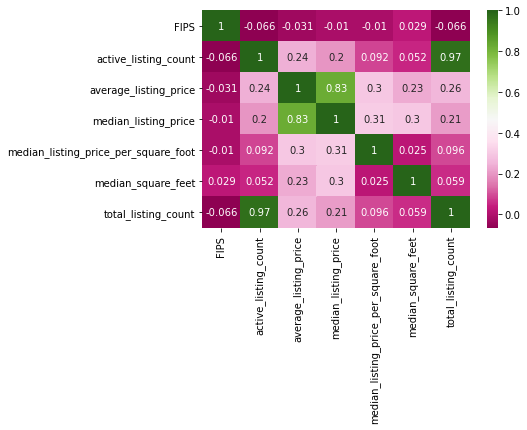

In [10]:
CorrMatrix = df[['FIPS', 'county', 'state', 'active_listing_count', 'average_listing_price', 
            'median_listing_price', 'median_listing_price_per_square_foot', 
            'median_square_feet', 'total_listing_count']].corr()
sns.heatmap(CorrMatrix, annot=True, cmap='PiYG')
plt.show()

The highest correlation is 97% which is between active listing count and total listing count. The next highest correlation is 83% which is between average listing price and median listing price.
# 3. Data Split to 2019 and 2021

In [11]:
# The data will only be limited to 2019 and 2021
df_2019 = df.loc[df['year']==2019]
df_2021 = df.loc[df['year']==2021]


# 4. Boxplot (State)
## 4.1 Average Listing Price (Mean)
### 4.1a For the Year 2019

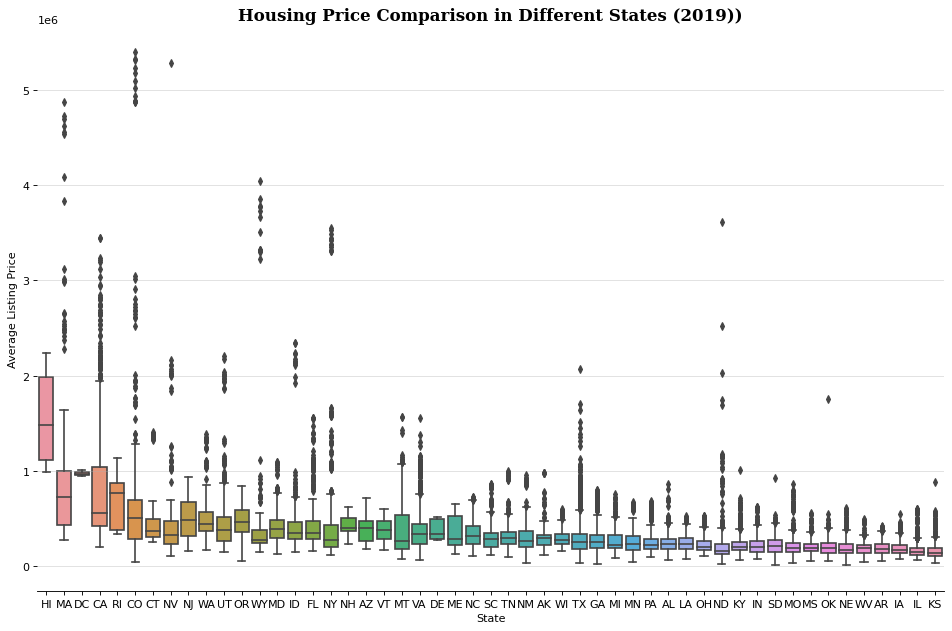

In [12]:
fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=80)

# by order of the state and get the average listing price
by_order = df_2019.groupby(by=['state'])['average_listing_price'].mean().sort_values(
    ascending=False).index

box_plot = sns.boxplot(x='state', y='average_listing_price', data=df_2019, order=by_order)
plt.ylabel("Average Listing Price")
plt.xlabel('State')
plt.title('Housing Price Comparison in Different States (2019))', fontsize=15, fontweight='bold', fontfamily='serif')
ax=box_plot.axes
lines = ax.get_lines()

#ax.ticks_params(axis='x', rotation=45)

for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

box_plot.figure.tight_layout()

In [13]:
# The Order by location of the average listing price for 2019
by_order

Index(['HI', 'MA', 'DC', 'CA', 'RI', 'CO', 'CT', 'NV', 'NJ', 'WA', 'UT', 'OR',
       'WY', 'MD', 'ID', 'FL', 'NY', 'NH', 'AZ', 'VT', 'MT', 'VA', 'DE', 'ME',
       'NC', 'SC', 'TN', 'NM', 'AK', 'WI', 'TX', 'GA', 'MI', 'MN', 'PA', 'AL',
       'LA', 'OH', 'ND', 'KY', 'IN', 'SD', 'MO', 'MS', 'OK', 'NE', 'WV', 'AR',
       'IA', 'IL', 'KS'],
      dtype='object', name='state')

### 4.1b For the Year 2021

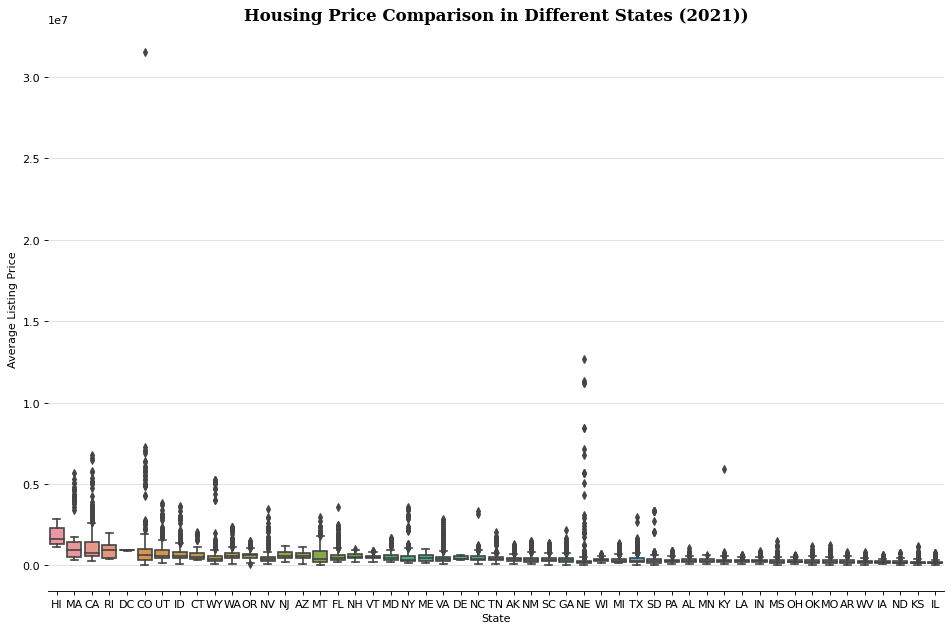

In [14]:
fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=80)

# by order of the state and get the average listing price
by_order = df_2021.groupby(by=['state'])['average_listing_price'].mean().sort_values(
    ascending=False).index

box_plot = sns.boxplot(x='state', y='average_listing_price', data=df_2021, order=by_order)
plt.ylabel("Average Listing Price")
plt.xlabel('State')
plt.title('Housing Price Comparison in Different States (2021))', fontsize=15, fontweight='bold', fontfamily='serif')
ax=box_plot.axes
lines = ax.get_lines()

#ax.ticks_params(axis='x', rotation=45)

for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

box_plot.figure.tight_layout()

In [15]:
# The Order by location of the average listing price for 2021
by_order

Index(['HI', 'MA', 'CA', 'RI', 'DC', 'CO', 'UT', 'ID', 'CT', 'WY', 'WA', 'OR',
       'NV', 'NJ', 'AZ', 'MT', 'FL', 'NH', 'VT', 'MD', 'NY', 'ME', 'VA', 'DE',
       'NC', 'TN', 'AK', 'NM', 'SC', 'GA', 'NE', 'WI', 'MI', 'TX', 'SD', 'PA',
       'AL', 'MN', 'KY', 'LA', 'IN', 'MS', 'OH', 'OK', 'MO', 'AR', 'WV', 'IA',
       'ND', 'KS', 'IL'],
      dtype='object', name='state')

## 4.2 Revised Box Plot
Outliers are removed and a new box plot is created
https://androidkt.com/detect-and-remove-outliers-from-pandas-dataframe/

### 4.2a For Year 2019

In [16]:
AZ = df_2019[(df_2019['state']=='AZ')]
DC = df_2019[(df_2019['state']=='DC')]
DE = df_2019[(df_2019['state']=='DE')]
HI = df_2019[(df_2019['state']=='HI')]
ME = df_2019[(df_2019['state']=='ME')]
NH = df_2019[(df_2019['state']=='NH')]
NJ = df_2019[(df_2019['state']=='NJ')]
OR = df_2019[(df_2019['state']=='OR')]
RI = df_2019[(df_2019['state']=='RI')]
VT = df_2019[(df_2019['state']=='VT')]

In [17]:
AK = df_2019[(df_2019['state']=='AK') & (df_2019['average_listing_price']<= 500000)]
AL = df_2019[(df_2019['state']=='AL') & (df_2019['average_listing_price']<= 410000)]
AR = df_2019[(df_2019['state']=='AR') & (df_2019['average_listing_price']<= 350000)]
CA = df_2019[(df_2019['state']=='CA') & (df_2019['average_listing_price'] <=1150000)]
CO = df_2019[(df_2019['state']=='CO') & (df_2019['average_listing_price']<=1280000)]
CT = df_2019[(df_2019['state']=='CT') & (df_2019['average_listing_price']<= 600000)]
FL = df_2019[(df_2019['state']=='FL') & (df_2019['average_listing_price']<= 600000)]
GA = df_2019[(df_2019['state']=='GA') & (df_2019['average_listing_price']<= 500000)]
IA = df_2019[(df_2019['state']=='IA') & (df_2019['average_listing_price']<= 330000)]
ID = df_2019[(df_2019['state']=='ID') & (df_2019['average_listing_price']<= 600000)]
IL = df_2019[(df_2019['state']=='IL') & (df_2019['average_listing_price']<= 240000)]
IN = df_2019[(df_2019['state']=='IN') & (df_2019['average_listing_price']<= 430000)]
KS = df_2019[(df_2019['state']=='KS') & (df_2019['average_listing_price']<= 280000)]
KY = df_2019[(df_2019['state']=='KY') & (df_2019['average_listing_price']<= 340000)]
LA = df_2019[(df_2019['state']=='LA') & (df_2019['average_listing_price']<= 420000)]
MA = df_2019[(df_2019['state']=='MA') & (df_2019['average_listing_price'] <=1700000)]
MD = df_2019[(df_2019['state']=='MD') & (df_2019['average_listing_price']<= 650000)]
MI = df_2019[(df_2019['state']=='MI') & (df_2019['average_listing_price']<= 390000)]
MN = df_2019[(df_2019['state']=='MN') & (df_2019['average_listing_price']<= 550000)]
MO = df_2019[(df_2019['state']=='MO') & (df_2019['average_listing_price']<= 330000)]
MS = df_2019[(df_2019['state']=='MS') & (df_2019['average_listing_price']<= 330000)]
MT = df_2019[(df_2019['state']=='MT') & (df_2019['average_listing_price']<=1030000)]
NC = df_2019[(df_2019['state']=='NC') & (df_2019['average_listing_price']<= 680000)]
ND = df_2019[(df_2019['state']=='ND') & (df_2019['average_listing_price']<= 350000)]
NE = df_2019[(df_2019['state']=='NE') & (df_2019['average_listing_price']<= 350000)]
NM = df_2019[(df_2019['state']=='NM') & (df_2019['average_listing_price']<= 590000)]
NV = df_2019[(df_2019['state']=='NV') & (df_2019['average_listing_price']<= 700000)]
NY = df_2019[(df_2019['state']=='NY') & (df_2019['average_listing_price']<= 500000)]
OH = df_2019[(df_2019['state']=='OH') & (df_2019['average_listing_price']<= 380000)]
OK = df_2019[(df_2019['state']=='OK') & (df_2019['average_listing_price']<= 360000)]
PA = df_2019[(df_2019['state']=='PA') & (df_2019['average_listing_price']<= 400000)]
SC = df_2019[(df_2019['state']=='SC') & (df_2019['average_listing_price']<= 500000)]
SD = df_2019[(df_2019['state']=='SD') & (df_2019['average_listing_price']<= 430000)]
TN = df_2019[(df_2019['state']=='TN') & (df_2019['average_listing_price']<= 530000)]
TX = df_2019[(df_2019['state']=='TX') & (df_2019['average_listing_price']<= 570000)]
UT = df_2019[(df_2019['state']=='UT') & (df_2019['average_listing_price']<= 800000)]
VA = df_2019[(df_2019['state']=='VA') & (df_2019['average_listing_price']<= 700000)]
WA = df_2019[(df_2019['state']=='WA') & (df_2019['average_listing_price']<= 850000)]
WI = df_2019[(df_2019['state']=='WI') & (df_2019['average_listing_price']<= 460000)]
WV = df_2019[(df_2019['state']=='WV') & (df_2019['average_listing_price']<= 310000)]
WY = df_2019[(df_2019['state']=='WY') & (df_2019['average_listing_price']<= 550000)]

In [18]:
df_all_2019 = pd.concat([CO, CT, WA, UT, NY, NV, WY, ID, FL, MD, MA, CA,
                    HI, DC, RI, OR, NH, AZ, VT, DE, ME, MT, VA, NC, 
                    SC, TN, NM, PA, AK, WI, TX, GA, MI, PA, AL, MN, 
                    LA, ND, KY, IN, SD, MO, MS, OK, NE, WV, AR, IA, 
                    IL, KS, OH, NJ], ignore_index=True, sort=False)

In [19]:
du = df_all_2019['state'].unique()
du

array(['CO', 'CT', 'WA', 'UT', 'NY', 'NV', 'WY', 'ID', 'FL', 'MD', 'MA',
       'CA', 'HI', 'DC', 'RI', 'OR', 'NH', 'AZ', 'VT', 'DE', 'ME', 'MT',
       'VA', 'NC', 'SC', 'TN', 'NM', 'PA', 'AK', 'WI', 'TX', 'GA', 'MI',
       'AL', 'MN', 'LA', 'ND', 'KY', 'IN', 'SD', 'MO', 'MS', 'OK', 'NE',
       'WV', 'AR', 'IA', 'IL', 'KS', 'OH', 'NJ'], dtype=object)

In [20]:
# This checks if states are not found  
df_2019[~df_2019['state'].isin(du)]

,FIPS,year,month,county,state,date,density,active_listing_count,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_per_square_foot,median_square_feet,total_listing_count,category


### New 2019 Box Plot

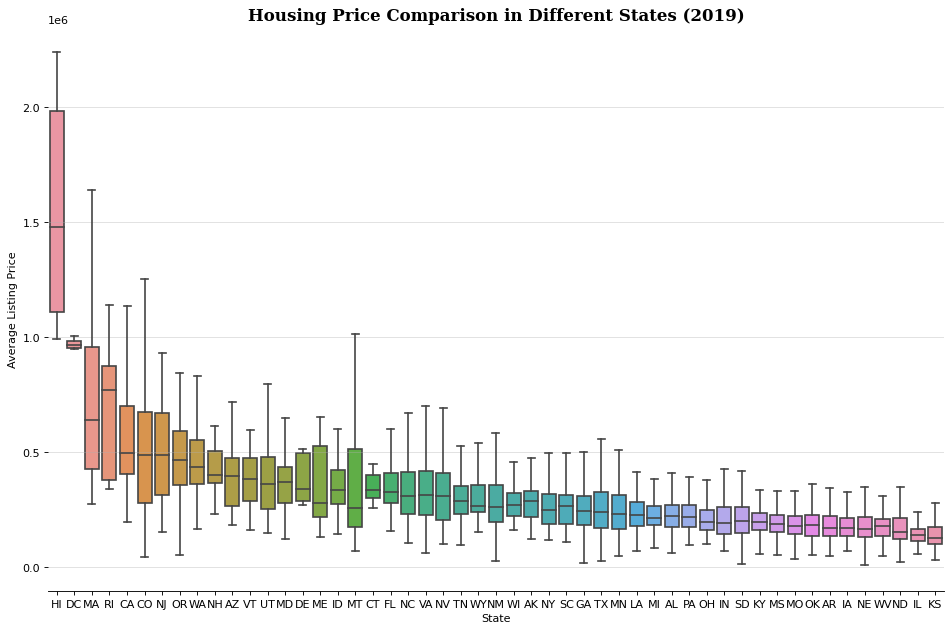

In [21]:
fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=80)

# by order of the state and get the average listing price
by_order = df_all_2019.groupby(by=['state'])['average_listing_price'].mean().sort_values(
    ascending=False).index

box_plot = sns.boxplot(x='state', y='average_listing_price', data=df_all_2019, order=by_order)
plt.ylabel("Average Listing Price")
plt.xlabel('State')
plt.title('Housing Price Comparison in Different States (2019)', fontsize=15, fontweight='bold', fontfamily='serif')
ax=box_plot.axes
lines = ax.get_lines()

#ax.ticks_params(axis='x', rotation=45)

for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

box_plot.figure.tight_layout()

In [22]:
df_all_2019.describe().T

,count,mean,std,min,25%,50%,75%,max
FIPS,35419.0,30673.352692,15064.001823,1001.0000,19035.0000,30013.0000,45047.0000,56045.0
year,35419.0,2019.000000,0.000000,2019.0000,2019.0000,2019.0000,2019.0000,2019.0
month,35419.0,6.496090,3.455231,1.0000,3.0000,6.0000,9.0000,12.0
density,35419.0,187.561676,696.616784,0.0000,16.0000,43.0000,111.0000,15692.0
active_listing_count,35419.0,333.854824,786.667961,0.0000,39.0000,109.0000,306.0000,17289.0
average_listing_price,35419.0,262679.937435,151137.722955,9900.0000,165792.5000,227292.0000,318042.5000,2235543.0
average_listing_price_mm,35371.0,0.007011,0.129378,-0.9391,-0.0208,0.0021,0.0280,12.3
average_listing_price_yy,35277.0,0.074249,0.506023,-0.9903,-0.0396,0.0385,0.1291,39.0
median_listing_price,35419.0,202930.963381,104442.864777,9900.0000,130000.0000,177450.0000,251793.0000,1149000.0
median_listing_price_mm,35371.0,0.009983,0.190632,-0.9059,-0.0217,0.0000,0.0289,24.6


### 4.2b For the Year 2021

In [23]:
AZ = df_2021[(df_2021['state']=='AZ')]
DC = df_2021[(df_2021['state']=='DC')]
DE = df_2021[(df_2021['state']=='DE')]
HI = df_2021[(df_2021['state']=='HI')]
ME = df_2021[(df_2021['state']=='ME')]
NJ = df_2021[(df_2021['state']=='NJ')]
RI = df_2021[(df_2021['state']=='RI')]

In [24]:
AK = df_2021[(df_2021['state']=='AK') & (df_2021['average_listing_price']<= 500000)]
AL = df_2021[(df_2021['state']=='AL') & (df_2021['average_listing_price']<= 410000)]
AR = df_2021[(df_2021['state']=='AR') & (df_2021['average_listing_price']<= 310000)]
CA = df_2021[(df_2021['state']=='CA') & (df_2021['average_listing_price']<= 1600000)]
CO = df_2021[(df_2021['state']=='CO') & (df_2021['average_listing_price']<= 1280000)]
CT = df_2021[(df_2021['state']=='CT') & (df_2021['average_listing_price']<= 600000)]
FL = df_2021[(df_2021['state']=='FL') & (df_2021['average_listing_price']<= 600000)]
GA = df_2021[(df_2021['state']=='GA') & (df_2021['average_listing_price']<= 500000)]
IA = df_2021[(df_2021['state']=='IA') & (df_2021['average_listing_price']<= 260000)]
ID = df_2021[(df_2021['state']=='ID') & (df_2021['average_listing_price']<= 1000000)]
IL = df_2021[(df_2021['state']=='IL') & (df_2021['average_listing_price']<= 240000)]
IN = df_2021[(df_2021['state']=='IN') & (df_2021['average_listing_price']<= 430000)]
KS = df_2021[(df_2021['state']=='KS') & (df_2021['average_listing_price']<= 300000)]
KY = df_2021[(df_2021['state']=='KY') & (df_2021['average_listing_price']<= 340000)]
LA = df_2021[(df_2021['state']=='LA') & (df_2021['average_listing_price']<= 420000)]
MA = df_2021[(df_2021['state']=='MA') & (df_2021['average_listing_price']<= 1700000)]
MD = df_2021[(df_2021['state']=='MD') & (df_2021['average_listing_price']<= 650000)]
MI = df_2021[(df_2021['state']=='MI') & (df_2021['average_listing_price']<= 390000)]
MN = df_2021[(df_2021['state']=='MN') & (df_2021['average_listing_price']<= 550000)]
MO = df_2021[(df_2021['state']=='MO') & (df_2021['average_listing_price']<= 330000)]
MS = df_2021[(df_2021['state']=='MS') & (df_2021['average_listing_price']<= 330000)]
MT = df_2021[(df_2021['state']=='MT') & (df_2021['average_listing_price']<= 1030000)]
NC = df_2021[(df_2021['state']=='NC') & (df_2021['average_listing_price']<= 680000)]
ND = df_2021[(df_2021['state']=='ND') & (df_2021['average_listing_price']<= 350000)]
NE = df_2021[(df_2021['state']=='NE') & (df_2021['average_listing_price']<= 350000)]
NH = df_2021[(df_2021['state']=='NH') & (df_2021['average_listing_price']<= 900000)]
NM = df_2021[(df_2021['state']=='NM') & (df_2021['average_listing_price']<= 550000)]
NV = df_2021[(df_2021['state']=='NV') & (df_2021['average_listing_price']<= 700000)]
NY = df_2021[(df_2021['state']=='NY') & (df_2021['average_listing_price']<= 500000)]
OH = df_2021[(df_2021['state']=='OH') & (df_2021['average_listing_price']<= 380000)]
OK = df_2021[(df_2021['state']=='OK') & (df_2021['average_listing_price']<= 360000)]
OR = df_2021[(df_2021['state']=='OR') & (df_2021['average_listing_price']<= 800000)]
PA = df_2021[(df_2021['state']=='PA') & (df_2021['average_listing_price']<= 400000)]
SC = df_2021[(df_2021['state']=='SC') & (df_2021['average_listing_price']<= 500000)]
SD = df_2021[(df_2021['state']=='SD') & (df_2021['average_listing_price']<= 430000)]
TN = df_2021[(df_2021['state']=='TN') & (df_2021['average_listing_price']<= 740000)]
TX = df_2021[(df_2021['state']=='TX') & (df_2021['average_listing_price']<= 570000)]
UT = df_2021[(df_2021['state']=='UT') & (df_2021['average_listing_price']<= 800000)]
VA = df_2021[(df_2021['state']=='VA') & (df_2021['average_listing_price']<= 700000)]
VT = df_2021[(df_2021['state']=='VT') & (df_2021['average_listing_price']<= 400000)]
WA = df_2021[(df_2021['state']=='WA') & (df_2021['average_listing_price']<= 1000000)]
WI = df_2021[(df_2021['state']=='WI') & (df_2021['average_listing_price']<= 460000)]
WV = df_2021[(df_2021['state']=='WV') & (df_2021['average_listing_price']<= 310000)]
WY = df_2021[(df_2021['state']=='WY') & (df_2021['average_listing_price']<= 550000)]

In [25]:
df_all_2021 = pd.concat([CO, CT, WA, UT, NY, NV, WY, ID, FL, MD, MA, CA,
                    HI, DC, RI, OR, NH, AZ, VT, DE, ME, MT, VA, NC, 
                    SC, TN, NM, PA, AK, WI, TX, GA, MI, PA, AL, MN, 
                    LA, ND, KY, IN, SD, MO, MS, OK, NE, WV, AR, IA, 
                    IL, KS, OH, NJ], ignore_index=True, sort=False)

In [26]:
du = df_all_2021['state'].unique()
du

array(['CO', 'CT', 'WA', 'UT', 'NY', 'NV', 'WY', 'ID', 'FL', 'MD', 'MA',
       'CA', 'HI', 'DC', 'RI', 'OR', 'NH', 'AZ', 'VT', 'DE', 'ME', 'MT',
       'VA', 'NC', 'SC', 'TN', 'NM', 'PA', 'AK', 'WI', 'TX', 'GA', 'MI',
       'AL', 'MN', 'LA', 'ND', 'KY', 'IN', 'SD', 'MO', 'MS', 'OK', 'NE',
       'WV', 'AR', 'IA', 'IL', 'KS', 'OH', 'NJ'], dtype=object)

In [27]:
# This checks if states are not found  
df_2019[~df_2019['state'].isin(du)]

,FIPS,year,month,county,state,date,density,active_listing_count,average_listing_price,average_listing_price_mm,average_listing_price_yy,median_listing_price,median_listing_price_mm,median_listing_price_yy,median_listing_price_per_square_foot,median_square_feet,total_listing_count,category


### New 2021 Box Plot

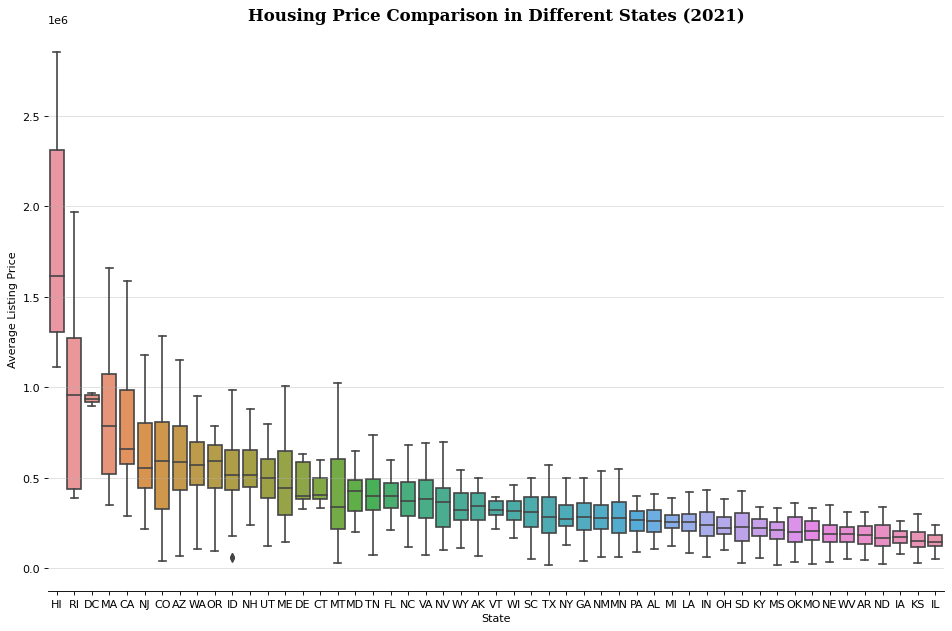

In [28]:
fig, ax = plt.subplots(1,1, figsize=(12,8), dpi=80)

# by order of the state and get the average listing price
by_order = df_all_2021.groupby(by=['state'])['average_listing_price'].mean().sort_values(
    ascending=False).index

box_plot = sns.boxplot(x='state', y='average_listing_price', data=df_all_2021, order=by_order)
plt.ylabel("Average Listing Price")
plt.xlabel('State')
plt.title('Housing Price Comparison in Different States (2021)', fontsize=15, fontweight='bold', fontfamily='serif')
ax=box_plot.axes
lines = ax.get_lines()

#ax.ticks_params(axis='x', rotation=45)

for x in ['top', 'left', 'right']:
    ax.spines[x].set_visible(False)
ax.grid(axis='y', linestyle='-', alpha=0.4)

box_plot.figure.tight_layout()

# 5. Save To CSV
This will save the cleansed data to csv files. df_2019.csv and df_2021.csv

In [29]:
df_all_2021.describe().T

,count,mean,std,min,25%,50%,75%,max
FIPS,31653.0,30922.971061,15068.356537,1001.0000,19053.0000,30063.0000,45089.000000,5.604500e+04
year,31653.0,2021.000000,0.000000,2021.0000,2021.0000,2021.0000,2021.000000,2.021000e+03
month,31653.0,6.450921,3.460602,1.0000,3.0000,6.0000,9.000000,1.200000e+01
density,31653.0,180.980444,707.797851,0.0000,16.0000,42.0000,106.000000,3.497900e+04
active_listing_count,31653.0,125.728209,317.075906,0.0000,16.0000,42.0000,109.000000,1.001000e+04
average_listing_price,31653.0,310950.793195,194375.433415,15800.0000,187327.0000,267132.0000,378335.000000,2.850052e+06
average_listing_price_mm,31573.0,0.016613,0.178037,-0.9896,-0.0398,0.0049,0.054700,1.065310e+01
average_listing_price_yy,31508.0,0.164060,0.399267,-0.9869,-0.0160,0.1167,0.278625,1.092040e+01
median_listing_price,31653.0,235938.512811,131119.524359,2382.0000,147250.0000,202950.0000,291925.000000,1.625000e+06
median_listing_price_mm,31573.0,0.034978,1.779027,-0.9947,-0.0399,0.0000,0.055600,3.134416e+02


In [30]:
df_all_2019.to_csv('df_2019.csv', index = False)
df_all_2021.to_csv('df_2021.csv', index = False)